In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_orig = pd.read_csv('./credit_train.csv', sep=';', index_col='client_id')

df = df_orig.copy(deep=True)
target = df['open_account_flg']

# sns.countplot(x='open_account_flg', data=df);
df.columns

Index(['gender', 'age', 'marital_status', 'job_position', 'credit_sum',
       'credit_month', 'tariff_id', 'score_shk', 'education', 'living_region',
       'monthly_income', 'credit_count', 'overdue_credit_count',
       'open_account_flg'],
      dtype='object')

In [231]:
if df["credit_sum"].dtype == 'object':
    df["credit_sum"] = df["credit_sum"].str.replace(',', '.')
    
df["credit_sum"] = df["credit_sum"].astype('float64')

if df["score_shk"].dtype == 'object':
    df["score_shk"] = df["score_shk"].str.replace(',', '.')
    
df["score_shk"] = df["score_shk"].astype('float64')

empty_indexes = df[df["credit_count"].isna()].index.to_list()
m = int(df["credit_count"].mean())

df.fillna({
    'age': int(df["age"].mean()),
    "marital_status": df["marital_status"].describe().top,
    "credit_sum": df["credit_sum"].mean(),
    "score_shk": df["score_shk"].mean(),
    "education": df["education"].describe().top,
    "living_region": df["living_region"].describe().top,
    "monthly_income": df["monthly_income"].mean(),
    "credit_count": m,
    "overdue_credit_count": m - 1,
}, inplace=True)

df["age"] = df["age"].astype('int')

In [232]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

encoder = preprocessing.LabelEncoder()

for dtype in df.dtypes.index:
    if df.dtypes[dtype] == 'object':
        df[dtype] = encoder.fit_transform(df[dtype])       

In [251]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X = df.drop(columns=['open_account_flg'])
y = df['open_account_flg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=34)

clf = LogisticRegression(random_state=2, solver='lbfgs')

clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

print("Accuracy - {}".format(clf.score(X_test, y_test)))
confusion_matrix(y_test, y_test_pred)

# Видим, что модель вообще не несет никакого смысла. Все предсказания дают в итоге ноль
# Accuracy у этой модели = 0.8229. Такой немаленький результат из-за того что классы несбалансированы и данная оценка 
# не источником доверия

Accuracy - 0.8229541945445188


array([[46371,     0],
       [ 9976,     0]])

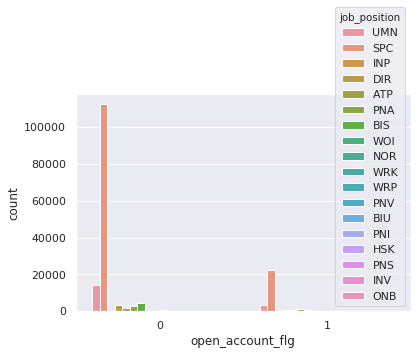

In [252]:
import seaborn as sns

sns.set(style='darkgrid')

sns.countplot(x='open_account_flg', hue="job_position", data=df_orig);
# Попробуем выделить категориальные признаки. Таковыми являются колонки gender, marital_status, job_position, education, living_region